In [7]:
import pandas as pd

# Load the first Excel file
file1_path = '31168- August 2024.xlsx'
data1 = pd.read_excel(file1_path)

# Print the exact column names to check for issues
print("Columns in the first dataset:", data1.columns)

# Strip extra spaces from column names to prevent errors
data1.columns = data1.columns.str.strip()

# Try filtering with cleaned column names (ensure column names are correct)
filtered_data1 = data1[['Date', 'Order', 'Address', 'Weight', 'Domestic']].dropna(subset=['Date'])

# Load the second Excel file and read data from Sheet2
file2_path = 'Dig Options - Track Racer Road Freight Rates.xlsx'
data2 = pd.read_excel(file2_path, sheet_name='Sheet2')

# Check the column names for the second dataset
print("Columns in the second dataset:", data2.columns)

# Strip spaces in column names of second dataset
data2.columns = data2.columns.str.strip()

# Filter necessary columns from Sheet2 (correct the column name)
filtered_data2 = data2[['Destinatione Zone', 'New Basic', 'New Per kg', 'New Min Charge']]

# Initialize a list to accumulate rows for better performance
merged_data_list = []

# Apply the rule: Check if 'Destination Zone' is included in 'Address'
for _, row in filtered_data1.iterrows():
    for _, zone_row in filtered_data2.iterrows():
        if zone_row['Destinatione Zone'] in str(row['Address']):
            # Prepare a new row with additional columns from the second dataset
            new_row = row.copy()
            new_row['New Basic'] = zone_row['New Basic']
            new_row['New Per kg'] = zone_row['New Per kg']
            new_row['New Min Charge'] = zone_row['New Min Charge']
            merged_data_list.append(new_row)

# Convert the list of rows to a DataFrame
merged_data = pd.DataFrame(merged_data_list)

# Display the merged data for verification
print(merged_data)


Columns in the first dataset: Index(['Date', 'Order', 'Name', 'Cost Centre #', 'Address', 'Unnamed: 5',
       'Product', 'Description', 'Qty', 'Process Charge', 'Domestic',
       'International', 'Total Charge', 'No. of Parcels', 'Weight', 'Cubic',
       'Con. Number', 'Delivery Courier'],
      dtype='object')
Columns in the second dataset: Index(['Destinatione Zone', 'Basic', 'New Basic', 'Per kg', 'New Per kg',
       'Unnamed: 5', 'MIN CHARGE', 'New Min Charge'],
      dtype='object')
           Date      Order                                            Address  \
1    2024-08-01  1321868.0  Attn: NATHAN FERGUS ,UNIT 28 / 18 FORESHORE ST...   
3    2024-08-01  1321908.0  Attn: NATHAN VA PAMELENN Phone: 0431373874, ,1...   
5    2024-08-01  1321909.0  Attn: ADELLE BROWNE Phone: 0431261353, NEWPARK...   
7    2024-08-01  1321910.0  Attn: BRETT MOFFATT Phone: 458270223, ,U 2 8 K...   
9    2024-08-01  1321911.0  Attn: ZANNON GOODE Phone: 0417 929 255, ,22 TA...   
...         ...  

### Calculated Charge

In [8]:
import pandas as pd

# Assuming merged_data contains the columns 'Domestic', 'New Basic', 'New Per kg', 'New Min Charge', and 'Weight'

# Step 1: Calculate the charge based on rate card
merged_data['Calculated Charge'] = merged_data.apply(
    lambda row: max(row['New Basic'] + (row['New Per kg'] * row['Weight']), row['New Min Charge']), axis=1
)

# Step 2: Compare calculated charge with domestic (actual charge)
merged_data['Charge Difference'] = merged_data['Domestic'] - merged_data['Calculated Charge']

# Step 3: Flag overcharge, undercharge, or correct charge
def charge_status(row):
    if row['Domestic'] > row['Calculated Charge']:
        return 'Overcharged'
    elif row['Domestic'] < row['Calculated Charge']:
        return 'Undercharged'
    else:
        return 'Correct'

merged_data['Charge Status'] = merged_data.apply(charge_status, axis=1)
merged_data

,Date,Order,Address,Weight,Domestic,New Basic,New Per kg,New Min Charge,Calculated Charge,Charge Difference,Charge Status
1,2024-08-01,1321868.0,"Attn: NATHAN FERGUS ,UNIT 28 / 18 FORESHORE ST...",7.00,18.99,9.48150,1.509375,26.985000,26.985000,-7.995000,Undercharged
3,2024-08-01,1321908.0,"Attn: NATHAN VA PAMELENN Phone: 0431373874, ,1...",5.00,14.02,9.48150,0.728000,18.116000,18.116000,-4.096000,Undercharged
5,2024-08-01,1321909.0,"Attn: ADELLE BROWNE Phone: 0431261353, NEWPARK...",0.25,7.33,31.60500,3.391500,63.210000,63.210000,-55.880000,Undercharged
7,2024-08-01,1321910.0,"Attn: BRETT MOFFATT Phone: 458270223, ,U 2 8 K...",0.05,7.33,9.48150,0.728000,18.116000,18.116000,-10.786000,Undercharged
9,2024-08-01,1321911.0,"Attn: ZANNON GOODE Phone: 0417 929 255, ,22 TA...",0.30,10.02,31.60500,3.391500,63.210000,63.210000,-53.190000,Undercharged
...,...,...,...,...,...,...,...,...,...,...,...
2415,2024-08-30,1325871.0,"Attn: ANGUS MCDOUGALL Phone: +61437448040, ANG...",6.00,23.48,9.48150,1.509375,26.985000,26.985000,-3.505000,Undercharged
2417,2024-08-30,1325873.0,"Attn: DANIEL MCCROHAN DANIEL MCCROHAN,48 ARMST...",15.00,30.62,31.60500,3.391500,63.210000,82.477500,-51.857500,Undercharged
2417,2024-08-30,1325873.0,"Attn: DANIEL MCCROHAN DANIEL MCCROHAN,48 ARMST...",15.00,30.62,9.04575,1.452937,29.907937,30.839812,-0.219812,Undercharged
2423,2024-08-30,1325874.0,"Attn: WAZEEN WAHAB WAZEEN WAHAB,14 CRIMSON DRI...",61.00,39.96,9.04575,1.452937,29.907937,97.674937,-57.714937,Undercharged


In [9]:
# Group data by 'Charge Status' and calculate descriptive statistics on 'Charge Difference'
descriptive_stats = merged_data.groupby('Charge Status')['Charge Difference'].agg(
    ['mean', 'median', 'min', 'max', 'std', 'count']
)

# Display the descriptive statistics
print(descriptive_stats)


                    mean     median       min         max        std  count
Charge Status                                                              
Correct              NaN        NaN       NaN         NaN        NaN      0
Overcharged    20.534600   6.160188    0.0285  240.947000  34.669008     99
Undercharged  -27.155035 -17.927937 -354.9525   -0.219812  33.641629    715


Total Overcharged: 2032.9253750000003
Total Undercharged: -19415.850112499997


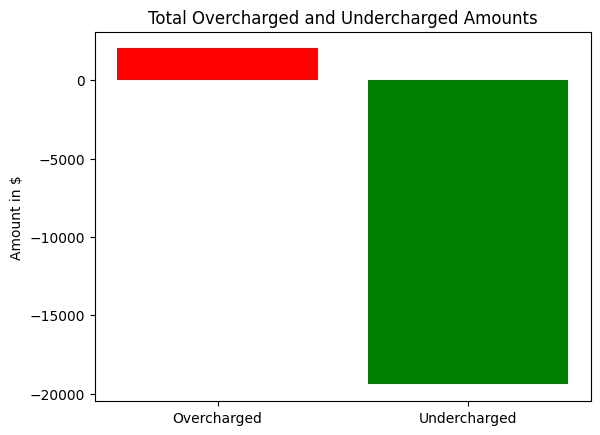

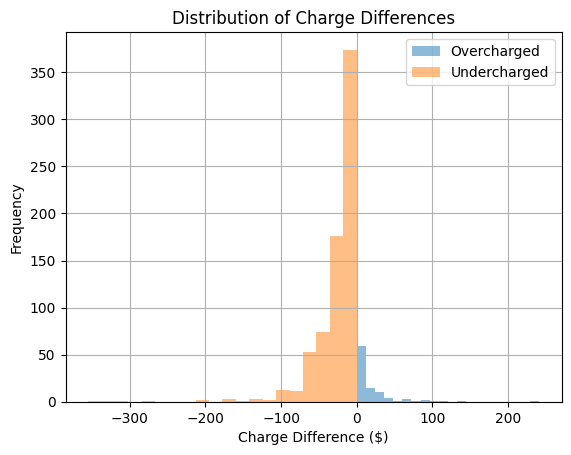

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total overcharged and undercharged amounts
total_overcharged = merged_data.loc[merged_data['Charge Status'] == 'Overcharged', 'Charge Difference'].sum()
total_undercharged = merged_data.loc[merged_data['Charge Status'] == 'Undercharged', 'Charge Difference'].sum()

# Print the totals
print(f"Total Overcharged: {total_overcharged}")
print(f"Total Undercharged: {total_undercharged}")

# Plot the total overcharged and undercharged as a bar chart
totals = {'Overcharged': total_overcharged, 'Undercharged': total_undercharged}
fig, ax = plt.subplots()
ax.bar(totals.keys(), totals.values(), color=['red', 'green'])
ax.set_title('Total Overcharged and Undercharged Amounts')
ax.set_ylabel('Amount in $')
plt.show()

# Plot the distribution of charge differences
fig, ax = plt.subplots()
for status, group in merged_data.groupby('Charge Status'):
    if status != 'Correct':  # Only plot Overcharged and Undercharged
        group['Charge Difference'].hist(ax=ax, label=status, alpha=0.5, bins=20)

ax.set_title('Distribution of Charge Differences')
ax.set_xlabel('Charge Difference ($)')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


In [11]:
# Write merged_data to an Excel file
output_file_path = 'merged_data_output.xlsx'  # Update this path as needed
merged_data.to_excel(output_file_path, index=False)

print(f"Merged data has been written to {output_file_path}")


Merged data has been written to merged_data_output.xlsx
